# Phase III Deliverable: Team 3_4

##Phase Leader Plan
| Phase | Leader |
| ----------- | ----------- |
| Phase 1: Project Plan, Describe Datasets, Joins, Tasks, Metrics | Daphne Lin |
|Phase 2: EDA, baseline pipeline, Scalability, Efficiency, Distriuted/Parallel Training, Scoring Pipeline | Tanmay Mahapatra|
| **Phase 3: Select Optimal Algorithm, Fine Tune, Submit Final Report**| **Nicole Liu** |

##Team 3_4 Meta Info
| Member | Email |
| ----------- | ----------- |
| Daphne Lin | daphnelin@ischool.berkeley.edu  |
|Tanmay Mahapatra | tmahapatra@ischool.berkeley.edu |
|Jun Park | jun.park@ischool.berkeley.edu |
|Nicole Liu | nicoleliu@ischool.berkeley.edu |

##Credit Assignment Plan
| Task | Accountable | Budgeted | Start Date | End Date | Est. Improvement |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| Agree on Meeting Days/Times and Data | All Team Members | 2 hours | 3/12 | 3/14 |
| Phase 1 Deliverables | All | 20 hours | 3/12 | 3/17 |
| Data Section Updates | Daphne Lin | 1 hour | 4/3 | 4/7|
| EDA | Tanmay Mahapatra | 8 hours | 3/22 | 4/7 |
| Block Diagram Updates | Jun Park | 1 hour | 4/3 | 4/7 |
| Algorithms Considered | Nicole Liu, Tanmay Mahapatra | 1 hour | 3/12 | 3/17 |
| Metrics Updates | Nicole Liu, Jun Park, Daphne Lin | 2 hours | 4/3 | 4/7 |
| Gantt Chart and Abstract Updates | Daphne Lin | 2.5 hours | 4/3 | 4/7 |
| Pipeline Steps Updates | Nicole Liu, Jun Park | 2 hours | 4/2 | 4/7|
| Baseline Model | Nicole Liu, Jun Park | 6 hours | 3/22 | 4/7 |
| Address Review Comments | Daphne Lin, Jun Park | 2 hours | 4/5 | 4/7|
| Consolidation and Submission | Daphne Lin, Tanmay Mahapatra | 1.5 hours| 4/5 | 4/7 |
| Google Slides Phase II | All | 1.5 hours| 3/26 | 4/3 |
| Improve Baseline Model | Nicole Liu | 3 hours| 4/10 | 4/15 |
| Further Feature Engineering | Daphne Lin | 6 hours| 4/10 | 4/15 |
| Build XGBoost Model | Nicole Liu | 6 hours| 4/10 | 4/17 |
| Build Neural Network Model | Jun Park | 6 hours| 4/10 | 4/17 | 
| Conduct Experiments | Nicole Liu, Jun Park | 25 hours| 4/16 | 4/18 | improved LR from f2 = 0.04 to f2 = 0.61; MLP NN from f2= 0.48 to f2 = 0.54; XGB from f2 = 0.38 to f2 = 0.50
| Clean Up End-to-End Pipeline | Tanmay Mahapatra, Jun Park | 4 hours| 4/16 | 4/19 |
| Google Slides Phase III | All | 2 hours| 4/16 | 4/17 |
| Finish Report Write-up | All | 6 hours| 4/16 | 4/19 |

## Abstract

Flight delays have significant implications for airlines, cargo services, airports, and passengers. Delays, diversions, and cancellations affect schedules and routes. Delayed cargo delivery leads to financial losses and perishable item damage. Airports face congestion and capacity issues. Passengers incur additional costs for accommodation.

Our study aims to predict delays two hours prior to the scheduled departure time to classify a flight as delayed or not delayed. We use the airlines dataset sourced from the TransStats data collection provided by the U.S Department of Transportation, the weather dataset from the National Oceanic and Atmospheric Administration repository encompassing data from 2015 to 2019. From these datasets, we use a combination of flight data (e.g. origin airport, scheduled time) and weather data (e.g. temperature, wind speed, humidity), as well as new features around seasonality and average prior delays, to predict flight delays. We built three set of models - **Logistic Regression, XGBoost and MLP neural network** - for this binary classification task. 

Our target audience, which includes airport authorities, airline carriers, and passengers, can use these models to predict and manage flight delays, which are crucial for mitigating financial losses and reputational damage in the airline industry.

The primary metrics we optimized for are F-2 (F-beta where beta = 2) and recall since not correctly predicting a delay has significant financial consequences (e.g., hotel costs, missed connections, pilots over time restrictions). By prioritizing the identification of delayed flights, this study will provide actionable insights for enhancing operational efficiency and reducing costs in the airline industry.

$$F_\beta = \frac{(1 + \beta^2) \cdot \text{Precision} \cdot \text{Recall}}{(\beta^2 \cdot \text{Precision}) + \text{Recall}}$$

We conducted various experiments on the three models and performed grid search on logistic regression and MLP NN model to find the best parameters. Our best model was logistic regression with 4 newly created features, 10 numerical features and 11 categorical features. It produced f2 of 0.61 and recall of 0.60 on the test set, using the 5 year airline and weather joined data.

##Data

To facilitate feature selection for our final dataset, we conducted a comprehensive Exploratory Data Analysis (EDA) on both the airlines and weather datasets. This process involved visualizing feature distributions and identifying pertinent features for subsequent feature engineering.

**Airlines Dataset:**
The airlines dataset utilized in our analysis is a subset spanning from 2015 to 2019, sourced from the TranStats data collection provided by the U.S. Department of Transportation (DOT).

https://www.transtats.bts.gov/Tables.asp?QO_VQ=EFD&QO_anzr=Nv4yv0r%FDb0-gvzr%FDcr4s14zn0pr%FDQn6n&QO_fu146_anzr=b0-gvzr

**Weather Dataset:**
We obtained the weather dataset from the National Oceanic and Atmospheric Administration repository, encompassing data from January 2015 to December 2019.

https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00516

**Station Dataset:**
In conjunction with the weather dataset, we utilized a provided station dataset, which facilitated the merging of flight and weather data.

**OTPW Dataset:**
The ATP (Airline On-Time Performance Data) flight data has been pre-joined with the Weather data to yield the OTPW (the joined ATP and Weather) dataset.


**Joined Dataset:**
To create our full dataset, we merge the weather and flights data using shared keys from different datasets.
- Joining Airport Codes with Station Dataset:
	Airport Codes dataset, which houses IATA as well as ICAO codes, can be joined with the Station dataset by joining on ICAO code to ‘neighbor_call’.
- Joining Station Dataset with Weather:
	Station dataset can be joined with Weather by joining ‘station_id’ to STATION.
- Combining Airport Codes with Weather Dataset:
	Airport Codes dataset can be combined with the Weather dataset based on IATA code.
- Joining Result with Flights Dataset:
	Join the result with Flights dataset on IATA code to create the final Joined Dataset.

Please refer to the appendix for details about how to clean data and join tables using external dataset.

**Key Feature Engineering Considerations:**
- Drop features with high co-linearity 
- Tranform categorical features into dense representatin of one-hot encoding
- Include new features to capture unique patterns e.g. seasonality, business of origin and destination airports, and average delays for tail number (all derived from data available 2hrs prior to departure)


##EDA
We conducted a comprehensive Exploratory Data Analysis (EDA) on both the airlines and weather datasets. Through this analysis, we employed various visualization techniques to explore feature distributions and discern relevant features for subsequent feature engineering endeavors.


**Airline Dataset EDA**

Upon initial analysis of the airlines dataset, we observed that the raw dataset for the year 2015 contains a total record count of 14,844,074 rows. However, it seems the raw airlines dataset has duplicated records and the total records count after dropping duplicates is 7,422,037. Following are some of the key features of the dataset:

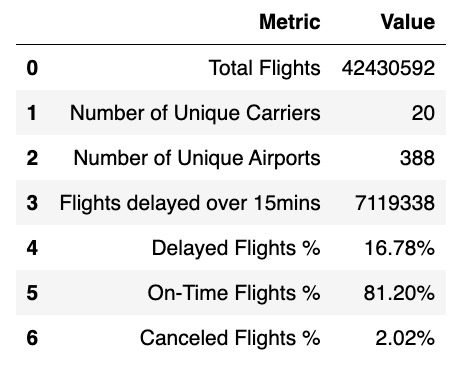

In [0]:
from IPython import display
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_2_figures/figure_1.jpg")

**Canceled Flights**

Approximately 2.02% of the records in the flights dataset had a null value for the outcome feature DEP_DEL15, indicating canceled flights. Given the irrelevance of canceled flights to our predictive modeling task (since they lack a departure delay label), and their minimal occurrence, we opt to exclude them from our dataset.

The dataset reveals that 7,119,338 flights experienced delays exceeding 15 minutes, constituting approximately 16.78% of the total number of flights. Conversely, the proportion of on-time flights stands at 81.20%. This significant class imbalance poses a risk of prediction bias towards categorizing flights as "on time," as machine learning algorithms often prioritize the majority class to optimize accuracy.

We intend to address the class imbalance by incorporating a balancing ratio into a weight column using the class weight option.

Additionally, the distribution of the DEP_DELAY_GROUP field, which categorizes delay times into 15-minute intervals, illustrates a right-skewed distribution. This skewness aligns with expectations, as the majority of flights experience delays of less than 15 minutes.


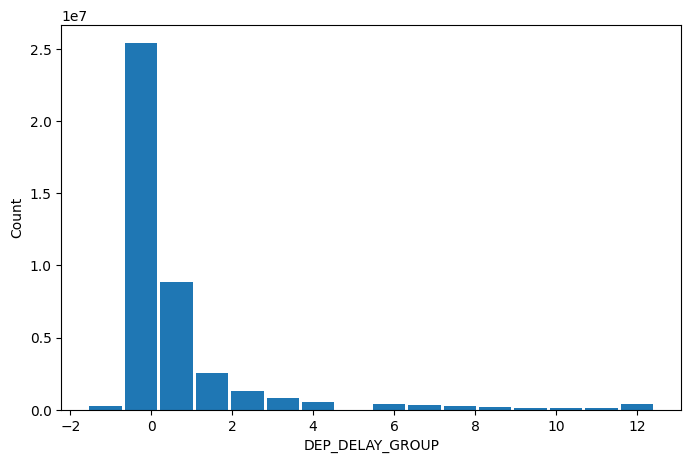

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_2_figures/figure_2.png")

**Delays Based on Origin Airport and Airline Carrier**

Among the multitude of factors influencing flight delays, the origin airport plays a pivotal role.

Following are the top 5 airports with the highest number of delays:
1. Atlanta (ATL)
2. Orlando (ORD)
3. Dallas-Fort Worth (DFW)
4. Denver (DEN)
5. Los Angeles (LAX)

This observation aligns with intuition, as these airports serve as major connection hubs in the U.S., accommodating a substantial volume of air traffic. 

Our analysis also revealed a discernible association between flight delays and airline carriers. To provide insights into carrier performance, we identified and ranked the top 10 carriers based on the frequency of delays. 

Following is the list of the Top 5 carriers (IATA Code):
1. Southwest Airlines (WN)
2. American Airlines (AA)
3. Delta Airlines (DL)
4. SkyWest Airlines (OO)
5. United Airlines (UA) 


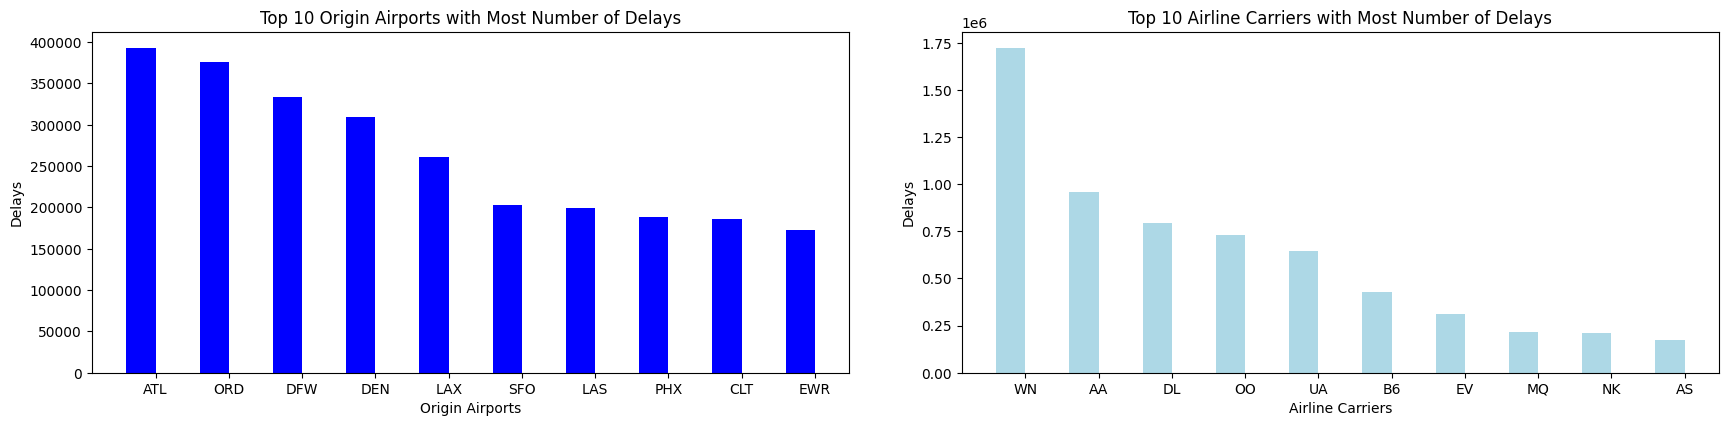

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_2_figures/figure_3.png")

**Delays Based on Time-related Factors**

We delved deeper into several time-related features concerning flight departure delays. We then generated histogram graphs to visualize the distributions and discern the following patterns:

1. Day of Week: Thursday and Friday have slightly more delays in a week
2. Day of Month: nearly uniform distribution
3. Quarter: nearly uniform distribution with slightly more delays in Q2 and Q3
4. Month of Year: June to August and the month of December have more delays in a year. This might relate to seasonality and holiday travel which we can consider for feature engineering.

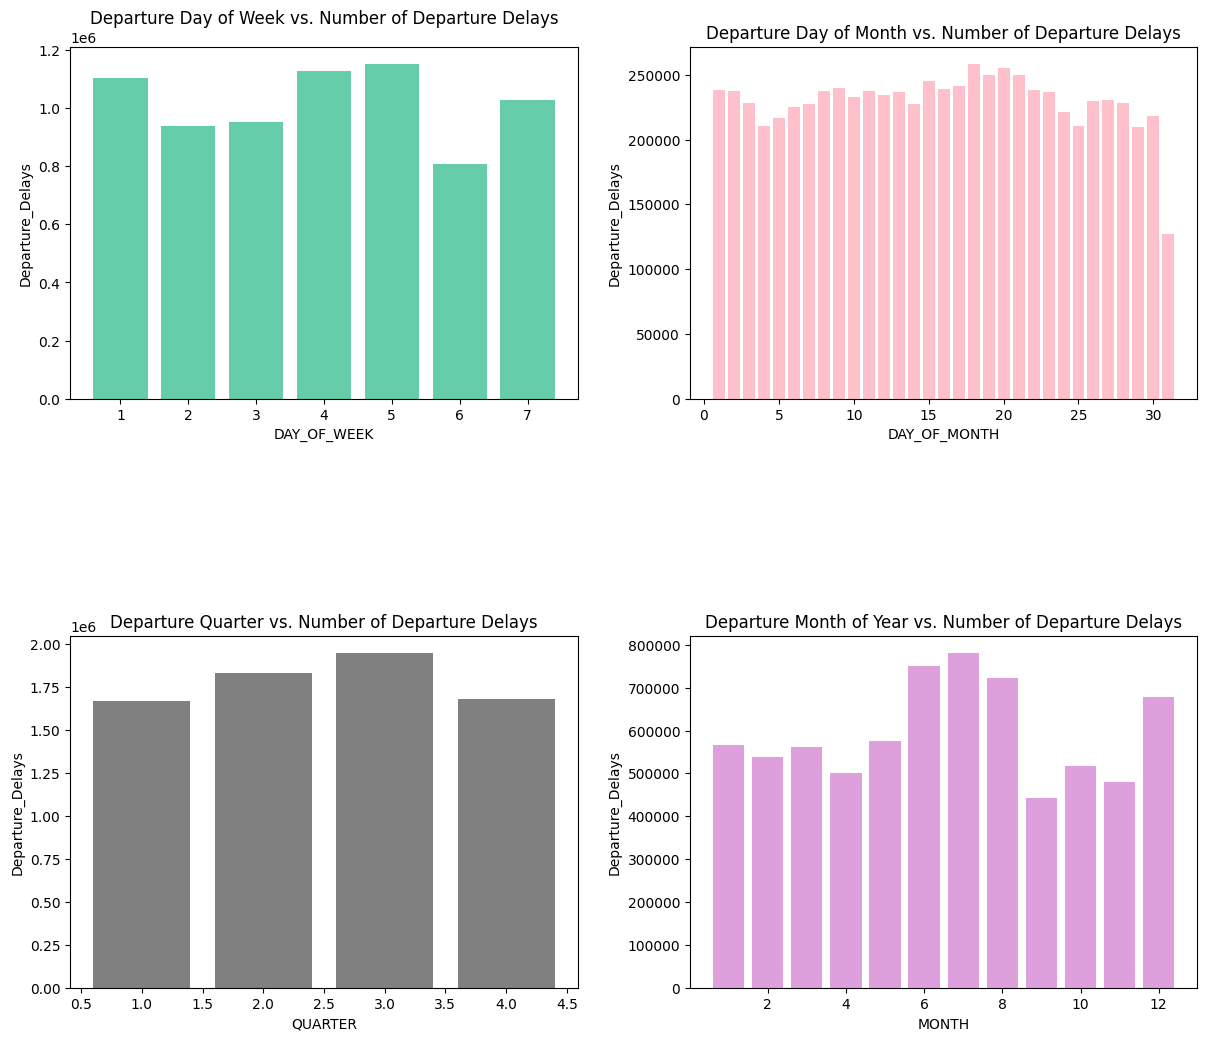

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_2_figures/figure_4.png")

**Delays Based on Seasonality**

To gain a comprehensive understanding of the data's seasonal patterns, we examined the daily average delay rate of flights across the entire dataset. This involved calculating the percentage of delayed flights for each day and subsequently computing the average delay rate for each day of the year, spanning all years (excluding February 29th to ensure consistent alignment of dates). Below, we present the resulting daily average delay rates plotted over a period of five years. Two notable observations emerge, each bearing significance for feature engineering and selection:

1. There is a noticeable seasonal trend, with higher delayed flight rates observed in the middle of the year (likely during summer vacation periods) and around the beginning and end of the year (likely due to holiday travel).
2. Specific holiday dates, such as July 4th, Nov 26th and December 25th, exhibit distinct delay characteristics. On these dates, there is a low delay rate attributed to reduced travel activity, whereas before and after these holidays, peak delay rates are observed due to increased travel volume.

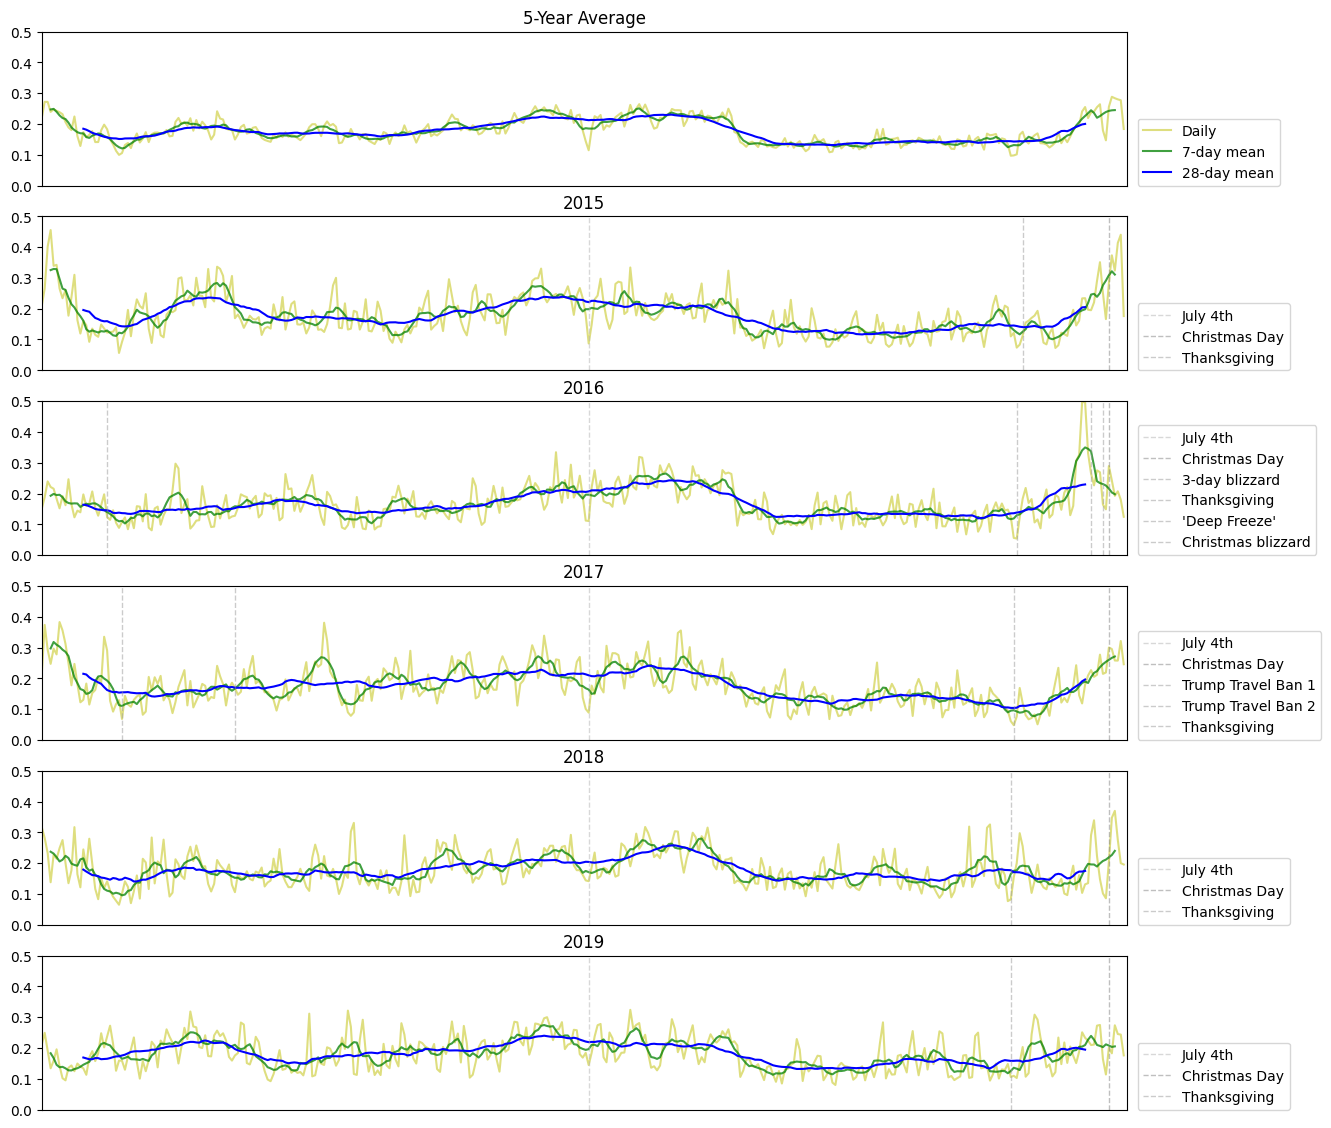

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_2_figures/figure_5.png")

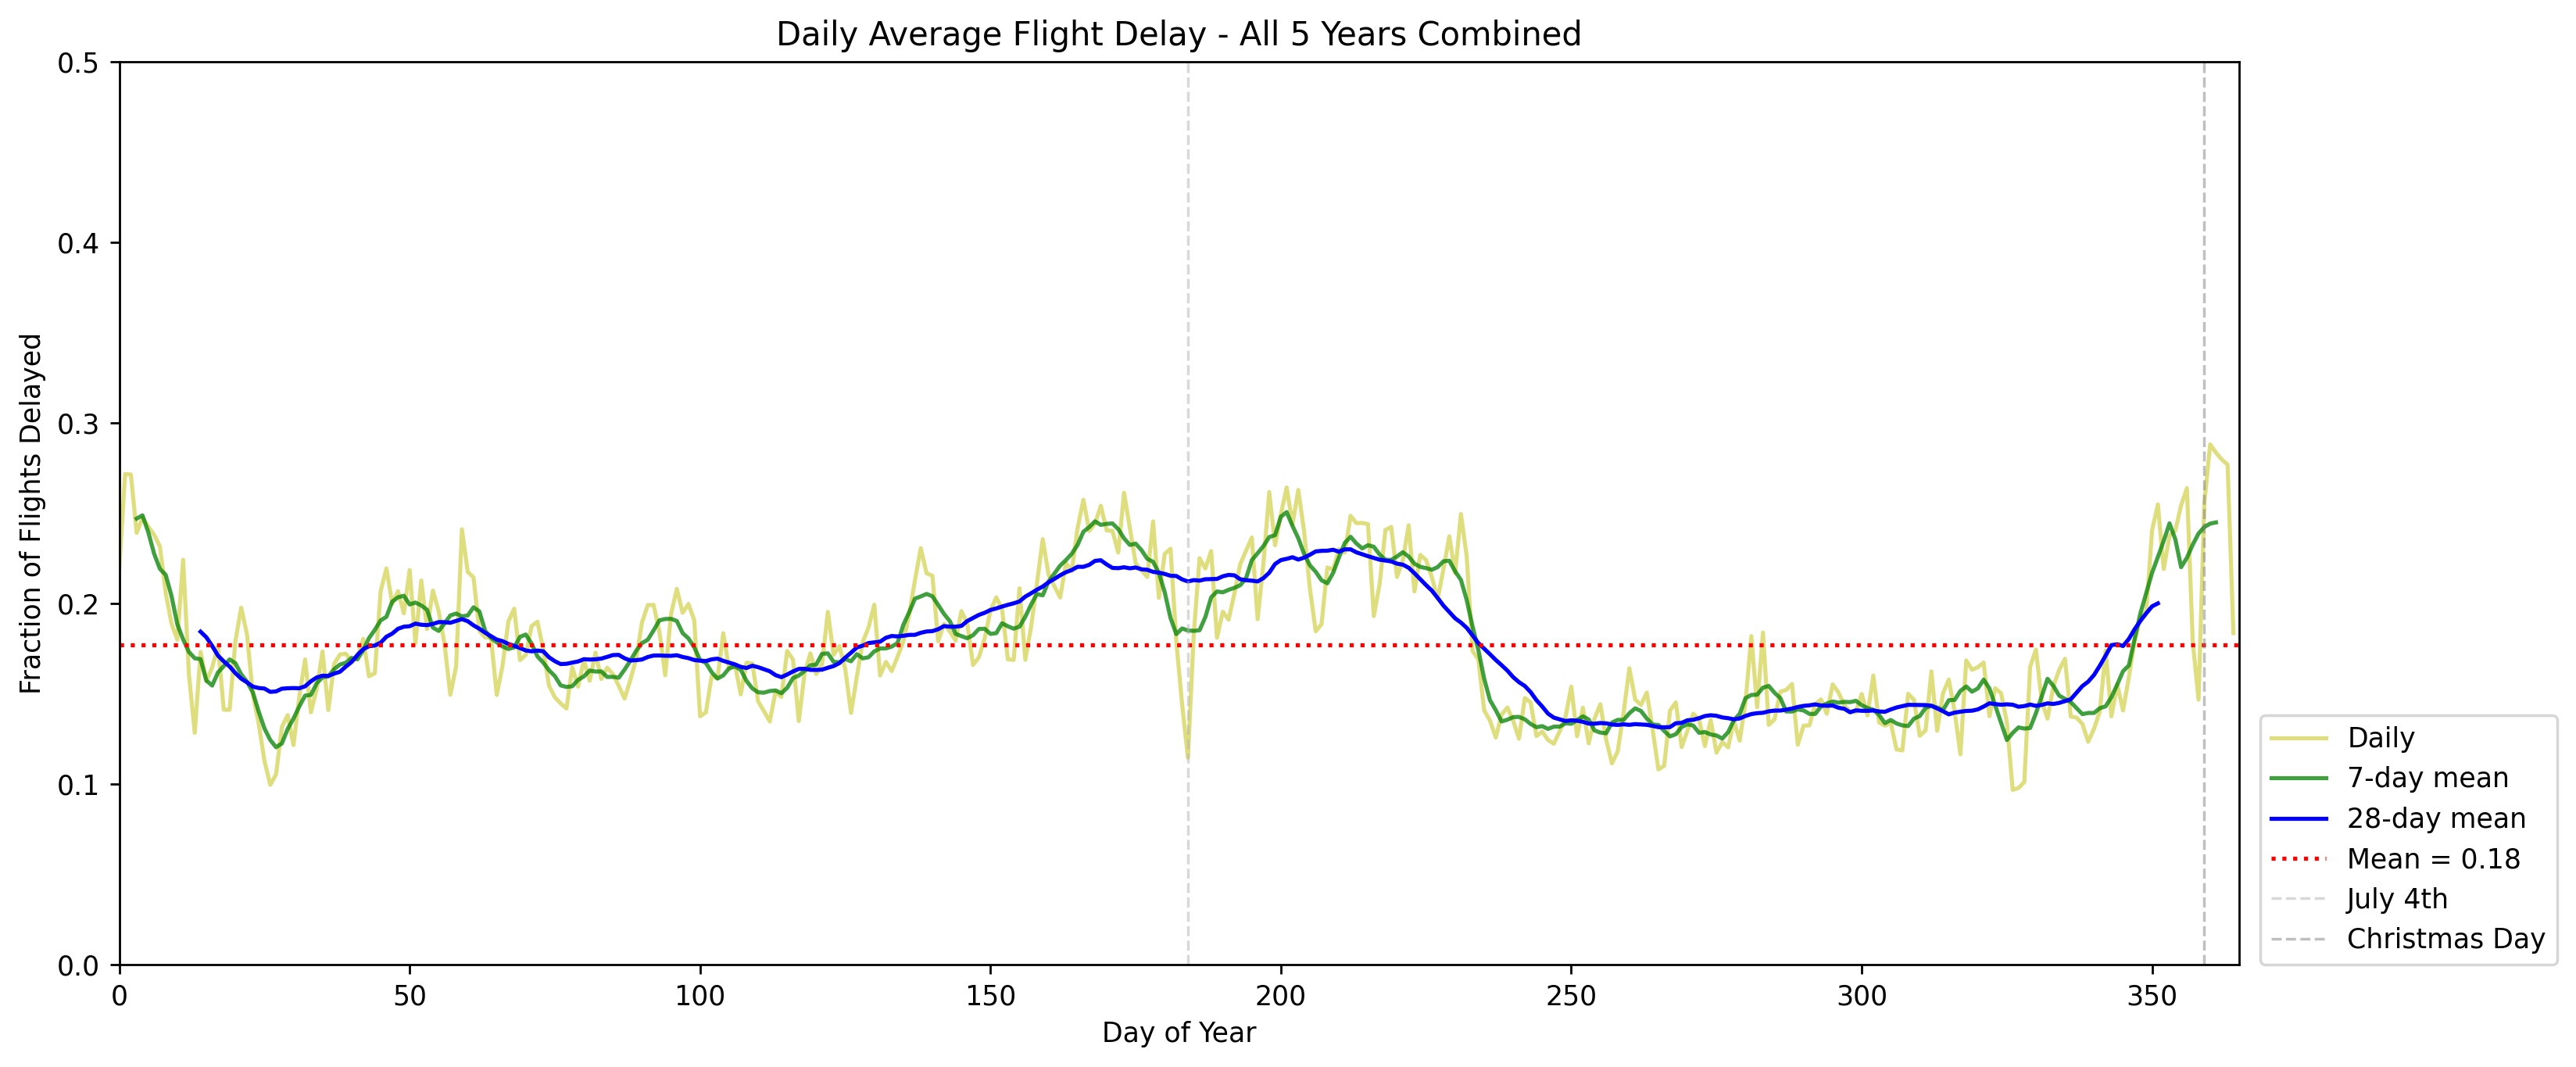

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_2_figures/figure_5_1.png")

**Delays Based on Origin Airport - Deep Dive**

The top five airports experiencing the highest number of delays are ORD, ATL, DFW, DEN and CLT. This observation aligns with intuition, considering these airports are among the busiest connection hubs in the U.S., thus experiencing higher traffic volumes. The scatter plot below illustrates the relationship between airport traffic volume and the proportion of delayed flights. While there is a subtle overall trend of increasing delay rates with higher airport traffic, there is also considerable variability. This suggests that incorporating the origin airport as a feature in our model selection could be beneficial for predicting flight delays.

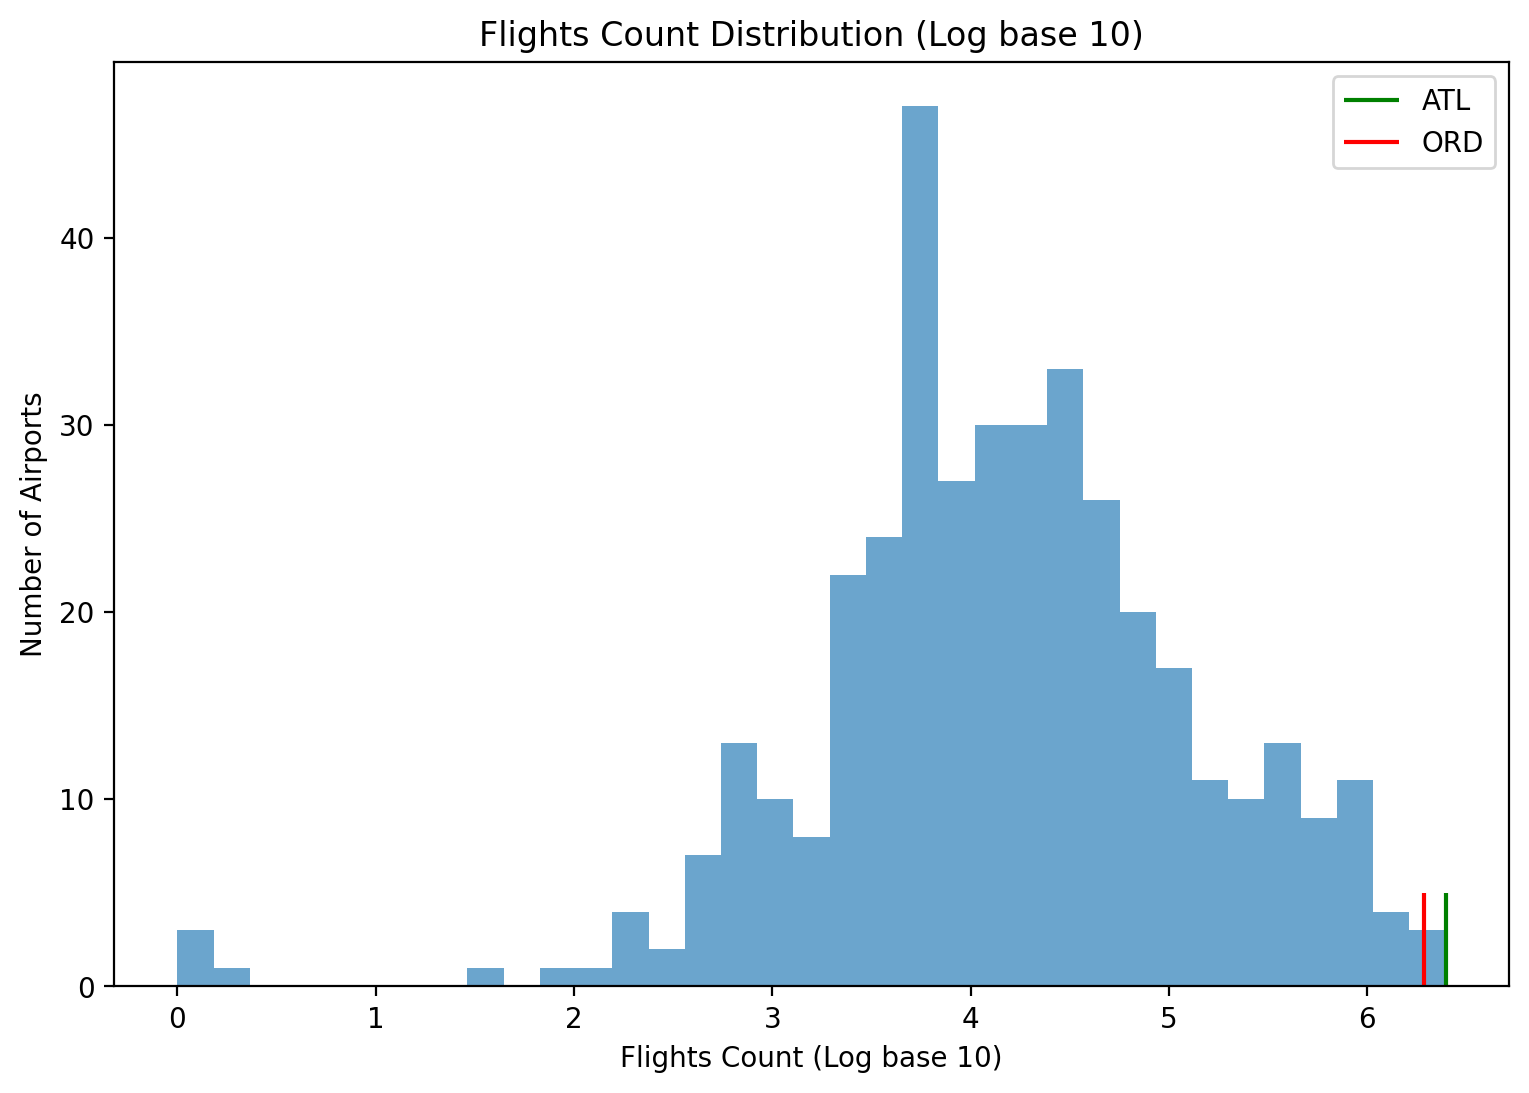

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_2_figures/figure_6.png")

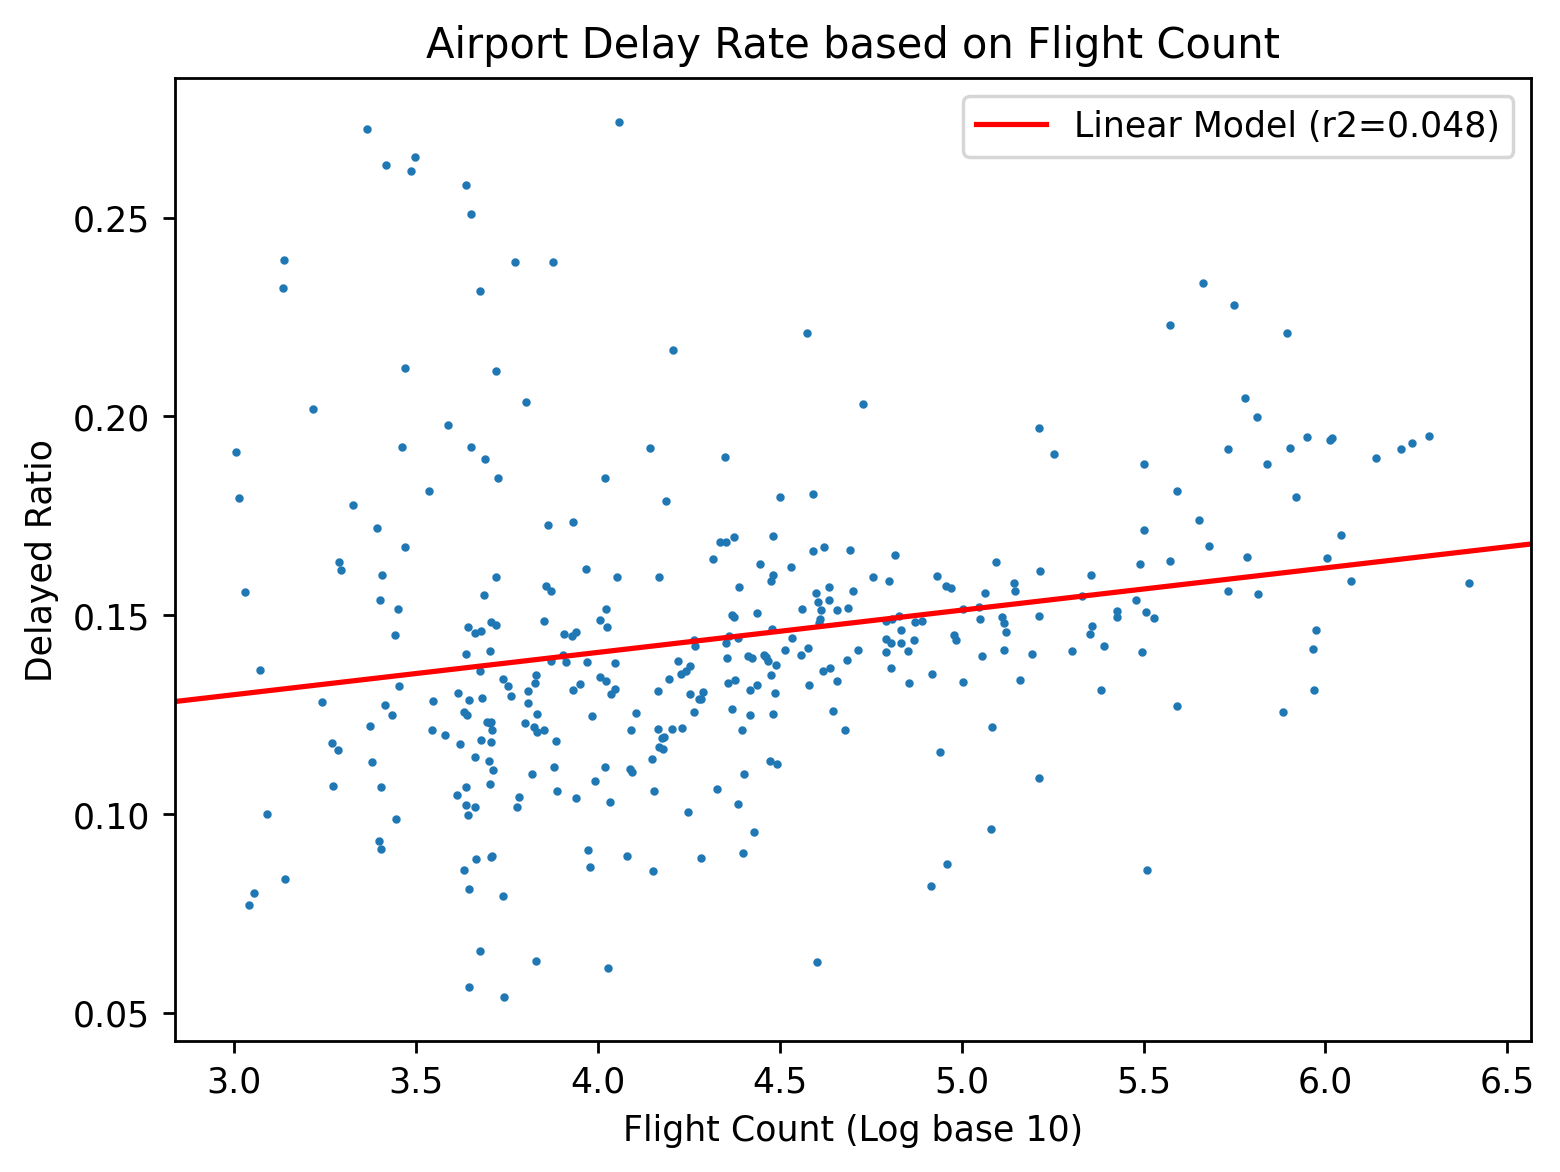

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_2_figures/figure_7.png")

**Weather Dataset EDA**

We also have access to an extensive dataset of weather observations, containing detailed, high-frequency data collected from monitoring stations across the United States. The weather dataset considered for this EDA contains a total records count of 898,983,399 rows. It seems the data is clean and that there are no duplicates. However, most of the recorded data is null indicating that many features have extremely sparse coverage. Therefore, we opted to disregard fields lacking sufficient completeness, as their inclusion might impact the performance of our algorithms and their ability to generate accurate predictions. Some of the key properties of the dataset are summarized in the table below. 


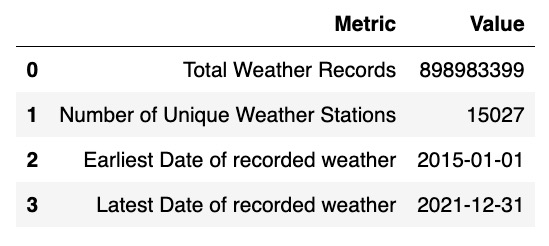

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_2_figures/figure_8.jpg")

**Combined Dataset - Join Weather and Flights Data**

To prepare the flight data for joining with the weather data, we conducted the following pre-processing steps:

- Identifying Compatible Weather Stations:
    - We verified if all weather stations could be successfully joined with IATA codes so that they could be matched to the flights data.
- Filtering Weather Stations Data:
    - We filtered down the weather stations data to those corresponding to an airport.
- Reducing the Size of Weather Data:
    - Once we had the station IDs of the weather stations associated with the airports in our dataset, we reduced the size of the weather data to make the join more efficient with the flights data.
    - We dropped all weather observations from other stations. Since most of the weather data comes from stations that are not at these airports, this step reduces the size of the weather data by approximately 96%, significantly decreasing the join time.
- Handling Duplicates:
    - As most weather stations usually report multiple weather records over the same hour, after these transformations, there will be many duplicates by weather station ID and timestamp.
    - We then dropped duplicates ordered by station ID and original datestamp to keep the observation closest in time to the final timestamp.

The following flow depicts the steps followed to create a joined dataset by merging the weather and flights data using shared keys from different datasets.


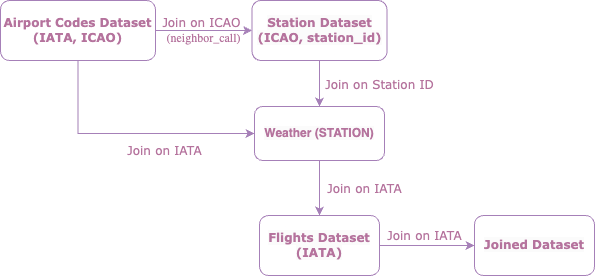

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_2_figures/Joined_Dataset.png")

**Pre-processing steps**

To prepare the flight data for joining with the weather data, we conducted the following pre-processing steps:

- Identifying Compatible Weather Stations:
    - We verified if all weather stations could be successfully joined with IATA codes so that they could be matched to the flights data.
- Filtering Weather Stations Data:
    - We filtered down the weather stations data to those corresponding to an airport.
- Reducing the Size of Weather Data:
    - Once we had the station IDs of the weather stations associated with the airports in our dataset, we reduced the size of the weather data to make the join more efficient with the flights data.
    - We dropped all weather observations from other stations. Since most of the weather data comes from stations that are not at these airports, this step reduces the size of the weather data by approximately 96%, significantly decreasing the join time.
- Handling Duplicates:
    - As most weather stations usually report multiple weather records over the same hour, after these transformations, there will be many duplicates by weather station ID and timestamp.
    - We then dropped duplicates ordered by station ID and original datestamp to keep the observation closest in time to the final timestamp.

**Combined Dataset EDA**

We opted to create a histogram depicting the average departure delay (in minutes) across different flight distance groups, categorized into intervals of 250 miles. The histogram illustrates a relatively uniform distribution of average departure delay with respect to flight distance, with the majority of flights falling into group 2 (n = 7,475,393). Notably, middle-distance flights (group 5) exhibit a slightly higher average delay of 11 minutes.


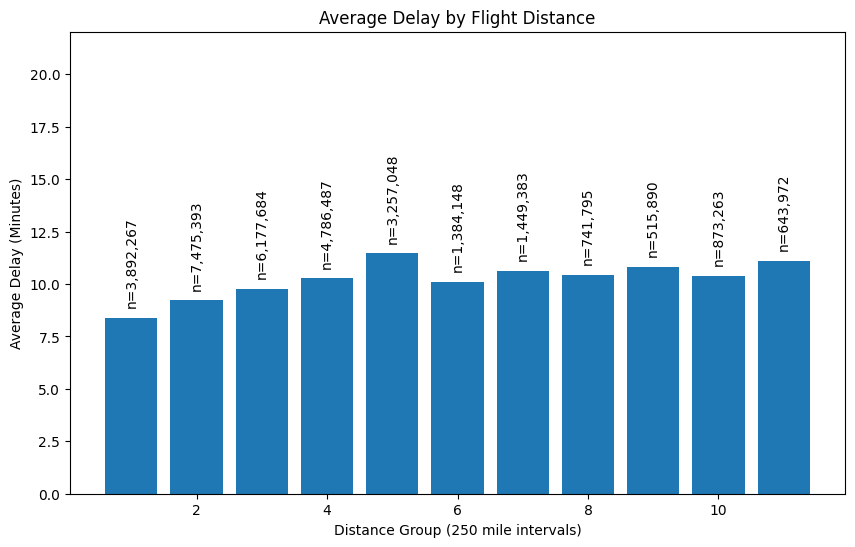

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_2_figures/figure_9.png")

##Feature Engineering

### New Feature Creation

We introduced an additional feature to our dataset i.e the Holiday flag, which identifies whether a date corresponds to a public holiday like July 4th or Christmas. Our exploratory data analysis (EDA) revealed distinct patterns in delay rates during holiday seasons, likely due to heightened traffic at popular airports. We classify the holiday itself as 'holiday' and designate the days surrounding it as 'near_holiday.' This distinction allows us to capture both the peaks around the holiday and the corresponding troughs, as observed in our EDA, enhancing the predictive capability of our models.

Additionally, we created three time-based features. We prioritized the snowball effect of operational issues that would not be easily identified in any existing features. Flight delays can often have a cumulative effect, potentially impacting subsequent flights if preceding flights experience delays. Thus, we created three time-based features, including the percentage of delays 2-4 hours before departure at both origin and destination airports, as well as the tail number delay for the last 4 flights leading up to the 2 hours prior to departure. These features should capture cummulative effects while using a time window that limits data leakage.

### Complete Feature Set

We conducted a series of steps described below to select and transform features.
1. Drop features from original OTPW columns based on these critieria
- features with high co-linearity, e.g. only keep one of "airport name" and "airport ID"
- features that are not known 2 hrs in advance e.g. "actual departure time", "air time" 
- features that have a high percentage of null values, e.g. time of sunset and sunrise

After the first step, the features were narrowed down to: 


[
    "DEP_DEL15", "CANCELLED", "YEAR","QUARTER", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK",
    "sched_depart_date_time_UTC", "DISTANCE", 'FL_DATE',
    "ORIGIN", "ORIGIN_CITY_MARKET_ID","ORIGIN_STATE_ABR",
    "DEST", "DEST_CITY_MARKET_ID","DEST_STATE_ABR",
    "DEP_DELAY","TAIL_NUM",
    'HourlyAltimeterSetting',
    'HourlyDewPointTemperature',
    'HourlyDryBulbTemperature',
    'HourlyRelativeHumidity',
    'HourlyStationPressure',
    'HourlyVisibility',
    'HourlyWetBulbTemperature',
    'HourlyWindDirection',
    'HourlyWindSpeed']


2. Perform data processing to transform categorical features into dense representaiton of one-hot encoding
- 6 categorical features transformed:

[
    "ORIGIN", "ORIGIN_CITY_MARKET_ID","ORIGIN_STATE_ABR",
    "DEST", "DEST_CITY_MARKET_ID","DEST_STATE_ABR",
]

- based on the EDA, we established there is no linear relationship between delay and the value of year, or month, or day of week, respectively. These ordinal featuers can be thought of as categorical in nature. They are therefore transformed similarly. 5 ordinal features transformed:

[
    "YEAR",
    "QUARTER",
    "MONTH",
    "DAY_OF_MONTH",
    "DAY_OF_WEEK"
]

3. Add in the new features created earlier

After these steps, we took out the original categorical features and the intermediate vectors. We also added in the 4 newly created feaures, which led to this feature set: 

['DISTANCE',
 'HourlyAltimeterSetting',
 'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature',
 'HourlyRelativeHumidity',
 'HourlyStationPressure',
 'HourlyVisibility',
 'HourlyWetBulbTemperature',
 'HourlyWindDirection',
 'HourlyWindSpeed',
 'YEARclassVec',
 'QUARTERclassVec',
 'MONTHclassVec',
 'DAY_OF_MONTHclassVec',
 'DAY_OF_WEEKclassVec',
 'ORIGINclassVec',
 'ORIGIN_CITY_MARKET_IDclassVec',
 'ORIGIN_STATE_ABRclassVec',
 'DESTclassVec',
 'DEST_CITY_MARKET_IDclassVec',
 'DEST_STATE_ABRclassVec',
 'is_near_holiday',
 'percent_delays_2h_origin',
 'percent_delays_2h_dest_before_depart',
 'last_4_avg_delay_tail']


##Algorithms for Models Used

1. Baseline model - Logistic Regression
- Rationale: Logistic Regression is a fast, low-cost model with high interpretability for binary classification.
- Loss function: Logistic regression typically uses the logistic loss function, also known as the binary cross-entropy loss, which measures the difference between predicted probabilities and actual binary outcomes.

- For the baseline model, Logistic Regression stands out due to its simplicity in implementation and training, making it effective for showcasing the direct correlation between independent variables and features with the target variable. Given the binary nature of the outcome variable (DEP_DEL15), the intuitive choice of logistic regression allows for exploration of the linear relationship for selected features based on model coefficients. In essence, the logistic regression model predicts the probability of Y=1 for the binary variable as a function of X. Moreover, model coefficients are easily interpretable, with the signs of each beta indicating positive or negative changes in Y (whether a flight will be delayed) given changes in predictor variables.

$$ \hat{y} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}} $$


- However, logistic regression requires pre-processing steps for both numeric and categorical features. Numeric features need to be scaled and normalized, for which we employed StandardScaler in the model pipeline. This scaler standardizes a feature by subtracting the mean and then scaling to unit variance. Similarly, categorical features need to be transformed, and encoding is a necessary pre-processing step. To achieve this, we utilized OneHotEncoder, which outputs categorical features with a sparse representation.

- The error space for regression models is a convex combination of L1 and L2 regularization, which facilitates the identification of error minimums during training. We utilized cross-validation to optimize the selection of hyperparameters in fine-tuning the model. To prevent overfitting, we employed Elastic Net regularization, which combines the properties of L1 Lasso and L2 Ridge regularization. In this context, two of the most pertinent hyperparameters are:

$$ \underset{w \in \mathbb{R}}{\min} \frac{1}{n} \| \hat{X}w - \hat{Y} \|^{2} + \lambda (\alpha \|w\|_{1} + (1-\alpha) \|w\|_{2}^{2}), \quad \text{where} \quad \alpha \in [0, 1] \quad \text{and} \quad \lambda \geq 0 $$

- `regParam`: represented by the regularization parameter λ where 0 implies no penalty for regularization.
- `elasticNetParam`: represented by α which is a culimination of L1 Lasso and L2 Ridge penalties in the range between 0 and 1. α = 1 implies an L1 penalty whereas α = 0 implies an L2 penalty.

- Lastly, while Logistic Regression is a widely-used method, it has its limitations, particularly regarding its assumption of linear relationships between independent variables and the outcome variable. In our business case, establishing linear relationships between flight delays and other independent variables like weather, flight duration, and carriers can be challenging. Additionally, Logistic Regression assumes minimal multicollinearity among independent variables, meaning features should not be highly correlated with each other. Moreover, in datasets with high dimensions, overfitting becomes a concern, especially without sufficiently large sample sizes. Hence, we've chosen to explore alternative algorithms, such as tree-based models, capable of handling nonlinear relationships between predictors and the outcome variable more effectively.

2. XGBoost: 
- Rationale: XGBoost is fast and low-cost, capable of handling non-linear data; generally good to prevent overfitting.
- Loss function: For binary classification tasks like flight delay prediction, the binary logistic or binary log loss is appropriate. This loss function measures the difference between predicted probabilities and the actual binary outcomes, similar to logistic regression.

- Gradient Boosted Trees, much like Random Forests, are an ensemble of "weak learners," comprising decision trees with small depths. Unlike Random Forest, which averages the predictions of many decision trees, Gradient Boosted Trees learn the trees sequentially. Each new tree aims to enhance predictions based on the errors of the preceding tree.

$$ \sum_{i} \log(1 + e^{-y_i f(x_i)}) $$

- XGBoost (eXtreme Gradient Boost) is another gradient boosted algorithm that is similar to Gradient Boosted Trees, but contains a number of optimizations. The XGBoost objective function aims to minimize the difference between the actual label and the predicted label, and can be broadly described as:

$$ L^{(t)} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t-1)} + f_t(x_i)) + \Omega(f_t) $$

3. Neural network: 
- Rationale: Neural networks capture complex interactions between features and patterns, although the cost can be much higher.
- Loss Function: For binary classification tasks, common loss functions for neural networks include binary cross-entropy loss, which measures the difference between predicted probabilities and actual binary outcomes.



##Success Metrics

We define success as correctly predicting delays. Thus, the primary metrics we optimize for are f-2 as well as recall. We chose an f-beta metric with beta >1 since not correctly predicting a true delay has significant financial consequences (e.g., hotel costs, missed connections, pilots over time restrictions). We also examine f1 to have a holistic view of model performance. While a model can have deceivingly high recall by predicting positives only, f-1 score will suffer in such a model structure. Prioritizing f-2 but including f-1 in review will help us balance the business objective and the model's overall adaptability.

| Metric | Formula | Relevance |
| ----------- | ----------- | ----------- |
| Recall | $$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$ | Recall measures our model’s ability to correctly predict delayed flights. It measures the proportion of correct delays we predict from the total number of delays in the dataset. We focus on recall as the costs to not predicting a delayed flight as delayed are high. |
F-beta | $$F_\beta = \frac{(1 + \beta^2) \cdot \text{Precision} \cdot \text{Recall}}{(\beta^2 \cdot \text{Precision}) + \text{Recall}}$$ | F-beta score provides us the flexibility to prioritize recall when we set the parameter to a value over 1. We will use the F-beta score in combination with the F1 score to ensure we also do not have too many false positives. |
| F1 | $$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$ | F1 measures the balance between our model precision and recall. A high F1 score suggests that the model has a good balance between precision and recall, meaning it is able to make accurate positive predictions, while also capturing a high proportion of actual positives. While we prioritize recall, we also recognize the costs to incorrectly identifying an on-time flight as delayed. | 


##Gantt Chart

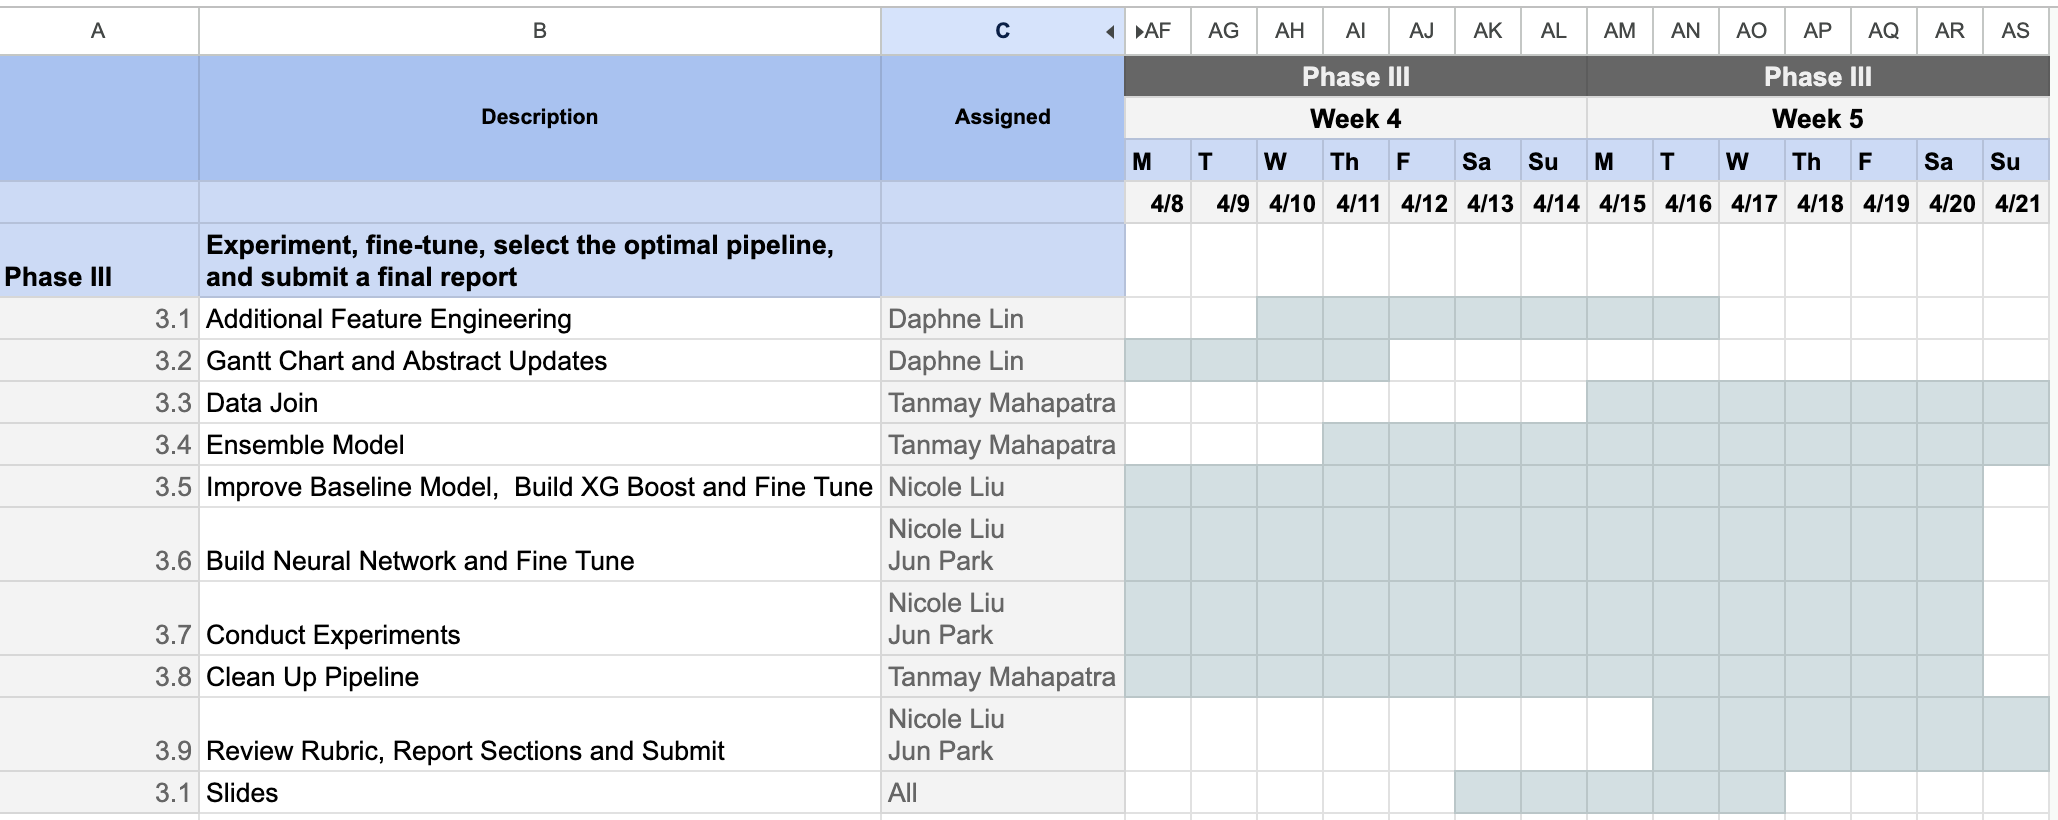

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_3_figures/figure_1.png")

##Pipeline Steps

**Data Extraction**
- Import 5 Year OTPW Data for final model performance outputs
- Import 1 YEAR OTPW Data for intermediate model experiments 

**Exploratory Data Analysis (EDA) / Data Processing**
- Explore distribution of features and overall patterns  
- Form initial hypotheses about relevant features 
- Clean up features including missing values, outliers, incorrect entries etc. 

**Data Cleaning / Feature Engineering** 
- Create potential new features that represent the interaction between variables, converting categorical variables to binary encodings, etc. 
- Join new features created 

**Data Checkpoint**
- Store intermediate results from EDA and Feature Engineering to serve as recovery points in case of any errors

**Data Splitting**
- Split data into Train / Test based on time series nature of data to avoid data leakage. For 1 Year data: train set = first 3 quarters of 2015, test set = last quarter of 2015. 
- For 5 Year data: train set = 2015 - 2018 data, test set = 2019 data. Specifically, XGBoost early stopping model has train set = 2015 - 2017 data, val set = 2019 first half data, test set = 2019 second half data

**Downsampling Majority Class**
- For train set (as well as val set for XGBoost), downsample the majority class ("no delay") to achieve equal sample sizes between two classes, to reduce model's bias toward the majority class
- For XGBoost model 5 Year model training, further downsize train set to 2% of original size, to avoid running out of memory in training  

**Data Checkpoint**
- Store intermediate results from Data Splitting to serve as recovery points in case of any errors

**Model Training**
- Set up the pipeline for Logistic Regression with MLlib 
- Set up the pipeline for XGBoost with MLlib 
- Set up the pipeline for MLP NN model with MLlib 

**Hyperparamater Tuning / Experiments**
- Run grid search to tune hyperparameters
- Run experiments on different subsets of features
- Run cross-validation to validate results of best model from grid search 

**Ensemble Method:**
- Save predictions from best performing models for logistic regression, neural network, and XGBoost
- Aggregate predictions into a single table and identify majority class for each observation (each row)
- Used the XGBoost model that used 2015-2018 as training data, 2019 as test data so that we could supply full year predictions from the XGBoost model for the ensemble
- Calculate success metrics (recall, F-2, F-1)


See flowchart below illustrating the pipeline process



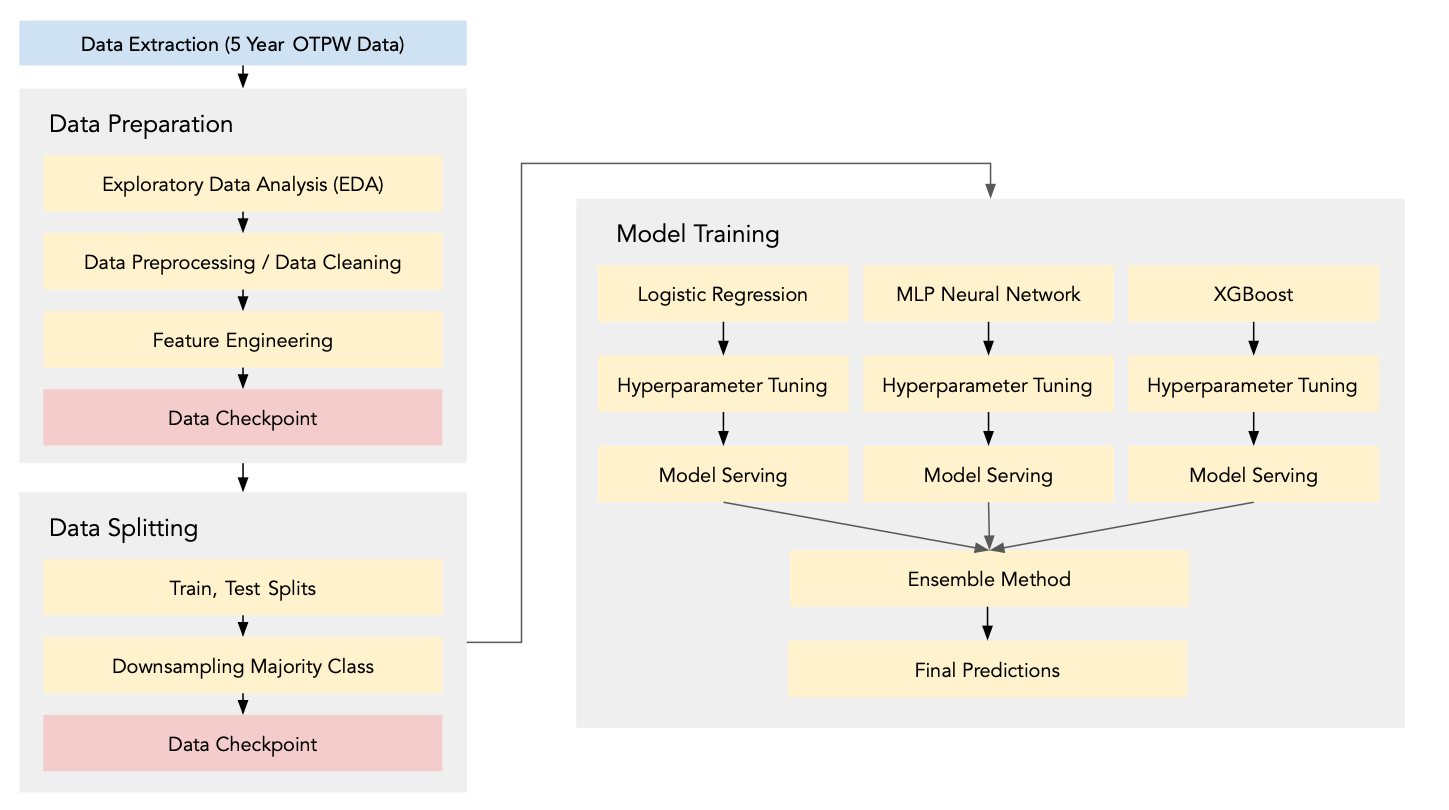

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_3_figures/pipeline.png")


## Experiment Results and Discussion


###Logistic Regression Results

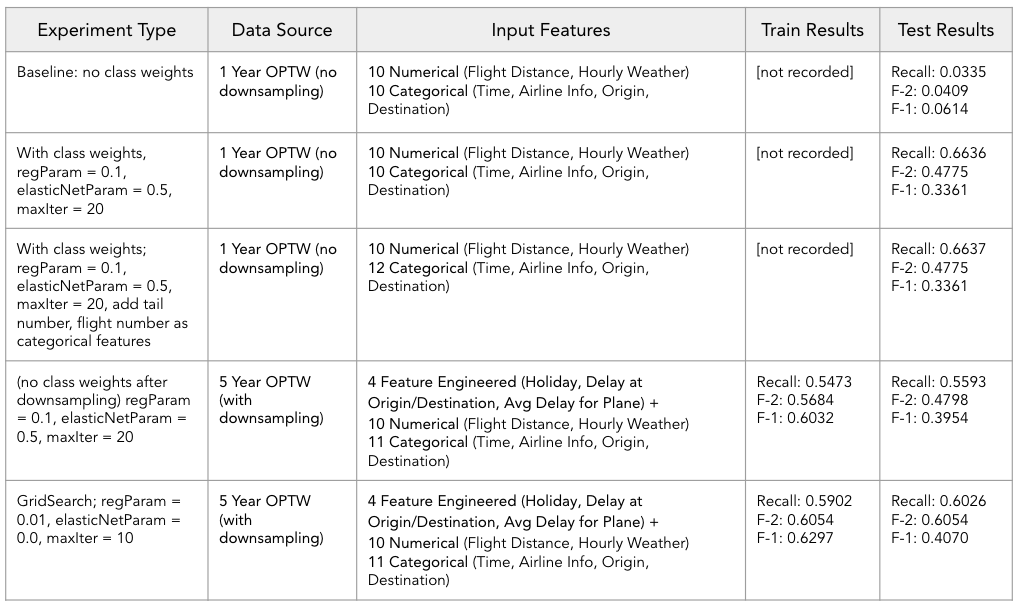

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_3_figures/logreg_results.png")

###MLP Neural Network Results (1 Year Data)

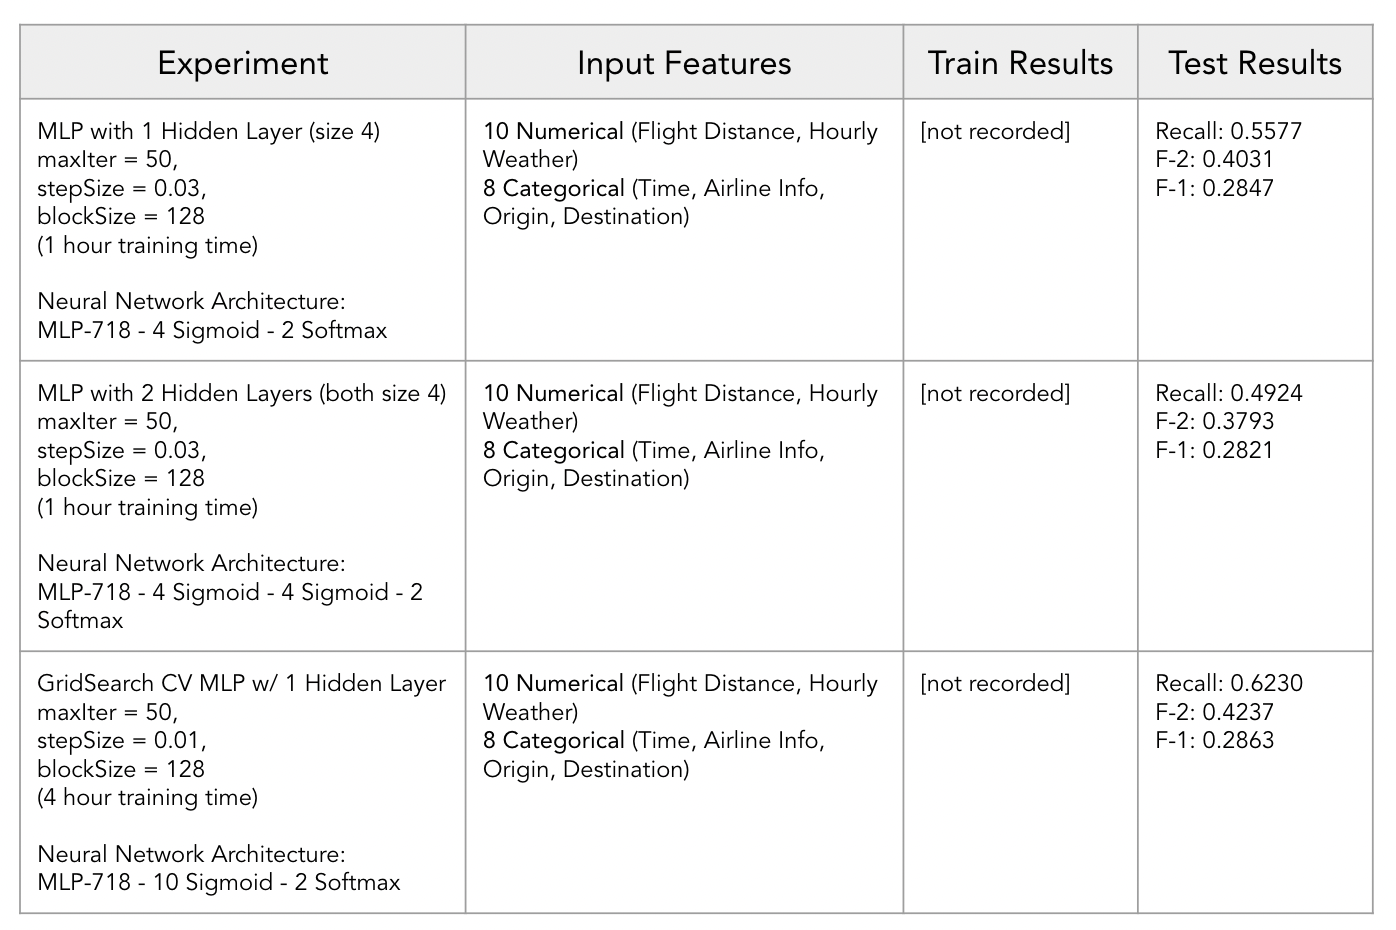

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_3_figures/nn_1year_results.png")


###MLP Neural Network Results (5 Year Data)

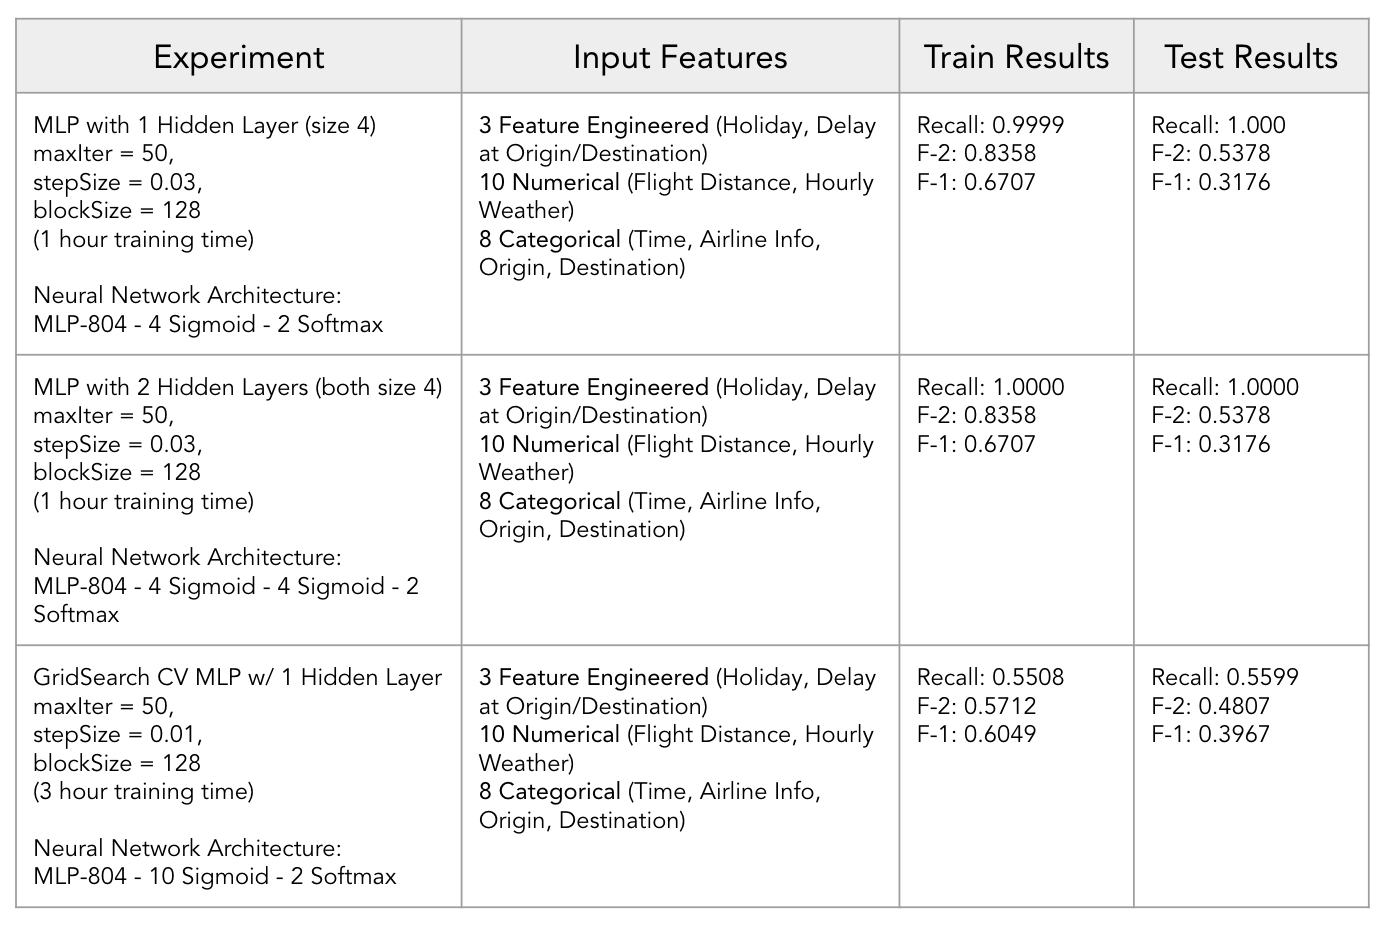

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_3_figures/nn_5year_results.png")


###XGBoost Results

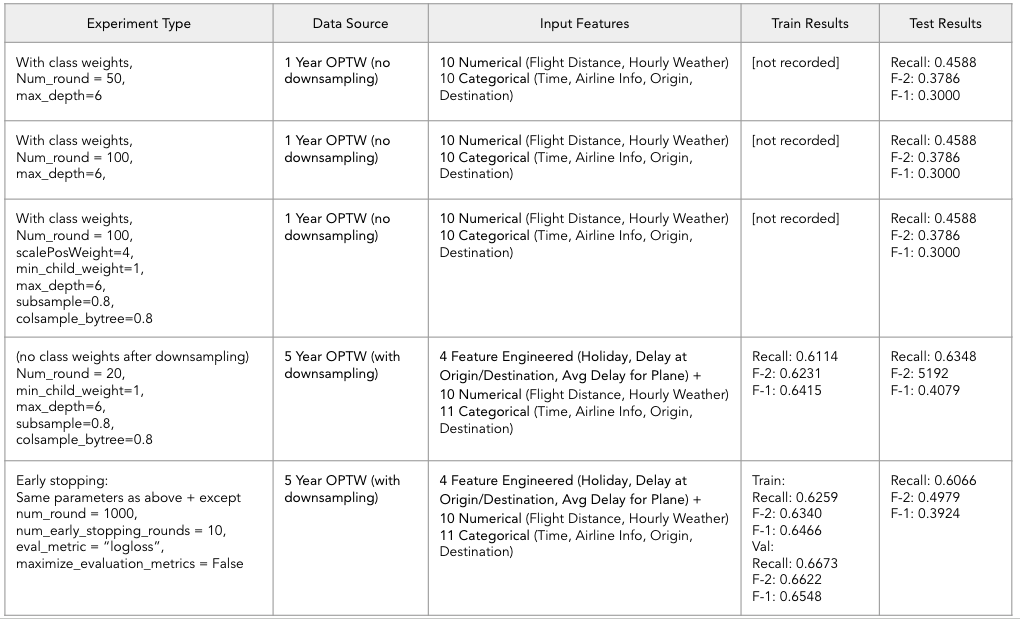

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_3_figures/xgboost_results.png")

### Ensemble Method

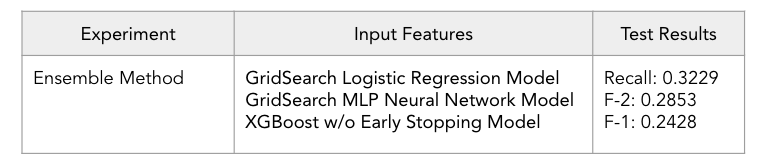

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_3_figures/ensemble_results.png")


##Discussion of Experiments and Results

###Logistic Regression
We started training the baseline logistic regression model on the 1 year data without downsampling the majority class or adding class weights to the model. The results (row 1 of logistic regression table above) were exceptionally bad with <0.1 recall and F-2 on test set. We then added class weights and performed a grid search; the best parameters improved the model to 0.66 recall and 0.48 on test set, a significant improvement. We then added two more categorical variables (flight number and tail number) to the model, which had no meaningful impact on the model but drastically increased training time (from ~2min to ~10min), which led us to conclude that the computational cost outweighed the benefits of the two additional features. We balanced the cost and the benefits by keeping the flight number and dropping the tail number, as the tail number has much more unique values and takes up more computationally resources in the one-hot encoding conversion and training process. Therefore, the last two models in the table had 1 more categorical feature than the previous three. Unfortunately we didn't record the train results for these experiments, but moving on to the 5 year data fitting, we made sure to include both train and test metrics. 

We then moved on to the 5 year data and instead of using class weights, we downsampled the majority class to have a balanced training set, and kept the test set class ratios untouched from the original 2019 dataset. We also added the 4 new features (holiday, delay at origin / destination, average delay by plane). Using the same parameters, the model actually had worse performance than on the 2015 data alone. This could be due to yearly differences between the train set and test set in the 5 year data. As previously the train and test set were from the same year (2015), now the test set contains idiosyncrasies not captured in train (2015 - 2018).

Lastly, we performed a grid search using the 5 year data; the best model improved both the train and test results moderately. The best logistic regression model (last row) has 0.60 on recall and 0.61 on f2. 

###MLP Neural Network
We started with baseline neural network using a multilayer perception (MLP) neural network model on the 1 year data with downsampling. After initial testing using 1 hidden layer (MLP-718 - 4 Sigmoid - 2 Softmax) and 2 hidden layers (MLP-718 - 4 Sigmoid - 2 Softmax), we used grid search to find the best model (MLP-718 - 10 Sigmoid - 2 Softmax) for this 1 year data. Our results improved as well, with recall going from 0.49 to 0.62, and F-2 going from 0.38 to 0.42 (from baseline model with 2 hidden layers to optimized model). Using a step size of 0.01 in our optimized model instead of the 0.03 in our baseline models may have also contributed to this improvement. Given this information, we had high hopes for our MLP models on the 5 year data.

Unlike the 1 year data models, our 5 year data models implemented the new feature engineered variables we created. For the neural networks, we added the 3 of the 4 new features (holiday, delay at origin / destination). Incorporating the the last feature about average delay by plane used information from the tail number variable, and including this tail number variable in the neural network model signficantly increased training time. For our first baseline with 1 hidden layer (MLP-804 - 4 Sigmoid - 2 Softmax), our training recall was 1.00 and F-2 was 0.84. Test recall was 1.00 and F-2 was 0.54. Our second baseline with 2 hidden layers (MLP-804 - 4 Sigmoid - 4 Sigmoid - 2 Softmax) had near identical train and test results. However, the big drop off in F-2 scores from train to test indicate some kind of overfitting, and the perfect recall score only happened because our models were predicting that all flights would be delays (all 1s) meaning no TN or FN classifications. To mitigate this issue, we ran a grid search to see if we could improve our results. Our hyperparameter tuned model (MLP-804 - 10 Sigmoid - 2 Softmax) was now using a 0.01 step size instead of the 0.03 used in the baseline and was using one hidden layer of size 10 instead of 4. Train recall was 0.55 and F-2 was 0.57, and test recall was 0.56 and F-2 was 0.48. These train-test results were much closer to each other in value than our baseline models, which tell us that we have resolved some of the bigger overfitting that was happening earlier. Although our recall is no longer perfect, this is because our hyperparameter-tuned model was now predicting non-delays (0) as well. 


###XGBoost
We started the model on the 1 year data with class weights and no downsampling, and with 40 rounds and max depth of 6 on every tree. We then experimented with manually adjusting and adding more parameters (without grid search). We increased the number of round from 50 to 100, and added scalePosWeight = 4 to further address class imbalance, and minimum child weight = 1 and subsample = 0.8 as well as colsample by tree = 0.8 to address overfitting. All of these iterations (first 3 rows of XGBoost table above) had very similar results with recall = 0.45 and F-2 = 0.38. This could be due to several reasons. First, it could be that the dominant parameter was max depth = 6, which remained the same throughout these experiments. This parameter limited the growth of trees and had similar effects as the subsampling ratios, which also aimed to address overfitting. Second, increasing the number of rounds might not have helped because the model has converged by round 50. Third, the class imbalance was already accounted for by class weights, and so scalePosWeight and minimum child weight didn't have additional benefits. Unfortunately we didn't record the train results for these experiments and weren't able to delve into more specific aspects of overfitting, but the the train metrics from the 5 year data shed new light on overfitting.

On the 5 year data, we downsampled the majority class and took out class weights. We used the exact same features as in logistic regression with the same assumptions, that (1) the new features would improve the model performance, (2) the tail number's computational cost outweighed the benefits and was excluded. With the same parameters as the best model trained on the 1 year data, the model - when trained on the 5 year data - increased recall to 0.63 and F-2 to 0.52 on test. We then experimented with early stopping, by spliting 2019 data into 2 subsets: the 1st half being the validation set and the 2nd half being the test set. This model had slightly better results on the train data, but worse performance on the test set (recall = 0.61 and F-2 = 0.50). We also notice that the validation set had the best results with recall = 0.67 and F-2 = 0.66. This suggests that the model was overfitted on the validation, and there are systematic differences between the 1st and 2nd half of 2019. It points to a limitation in how we split val and test - if we had ensured the distribution between val and test were more similar, the model performance could have been better. 

We were unable to run grid search on XGBoost as the runtime was exceedingly long, and we ultimately terminated the process after 3 hours. We did perform an importance score ranking and the top 12 features were shown in the graph below. The ranking confirmed our hypothesis that the newly created features were highly relevant, as well as seasonality factors (indicated by day of month, month, day of week). The airline was also highly important, ranked higher than any weather factors. 


###Ensemble
To wrap up our models and experiments, we aggregated the results from our three model to simulate an ensemble model. From our logistic regression, we used the 2019 predictions from the grid search hyperparameter-tuned model. From our MLP neural networks, we also used the 2019 predictions from the grid search hyperparameter-tuned model. For XGBoost, we used the model with the best performance on 2019 as test. After aggregating the predictions and finding the majority class for each prediction, we were left with a 0.32 recall and 0.29 F-2. This is significantly worse than any of the results we achieved with our three individual models, possibly because the individual models all shared similar variables and made similar errors in prediction, and bringing the three together only expanded on these errors. 

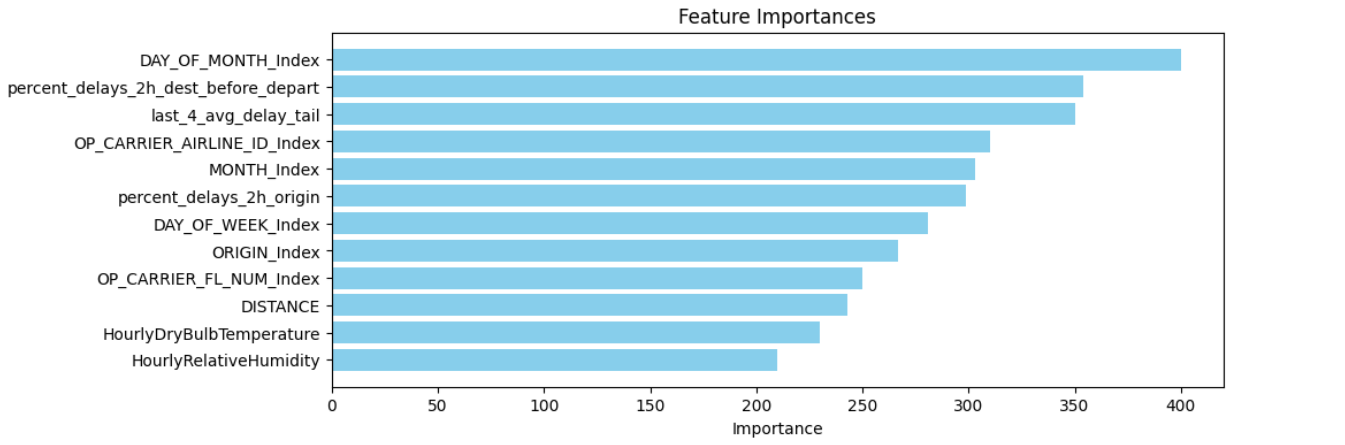

In [0]:
display.Image("/Workspace/Users/daphnelin@berkeley.edu/final_project/phase_3_figures/importancescore.jpg")


##Data Leakage

Data leakage is a common problem in time series predictions. This can happen when (1) the features used in the model are not available at the time of prediction (e.g. temperature at time of departure), (2) the target variable is included in the features set (e.g. if the feature set had used "DEP_DELAY" to predict "DEP_DELAY15") (3) the training data has information about the future, which is not normally available at the time of prediction (example below).

Regarding (1), we made sure that the features chosen do not contain information not available prior to 2 hours of departure. In the newly created features, we set the time window to 4-2 hours before departure for the delay at origin and destination airports, and up to 2 hours before departure for the average delay of the plane. Regarding (2), we didn't include any variable containing information about the delay in the feature set. 
Regarding (3), in phase I we had noted data leakage due to a random split of train / test. Since phase II, we adhered to time series based spliting methods for train / test, ensuring that the test set was in a time period after the train set. It is important to note, however, that during cross-validation we employed the Pyspark innate function "CrossValidator" which did not take care of the time series nature of the data. With that said, we then reran the models using the best parameters on the suggested train / test split (2015 - 2018 being train and 2019 being test) and got similar results. The reported results from best models were from these model runs. 


##GAP Analyais 

Based on the F-2 metric, our best performing model is logistic regression which achieved 0.60 on recall and 0.61 on f2. This is the result of grid search, which generated a ~0.05 improvement on the main metrics compared to before. Among the test predictions, it has true negatives of 3,711k samples, false positives of 1,556k samples, false negatives of 540k samples and true positives of 686k samples. The model has a high number of false positives, indicating that the model is frequently falsely labeling non-delayed flights as delayed, which can lead to unnecessary operational adjustments and waste of resources. The false negatives indicate that about 40% of actual delays are being missed, leading to unresolved customer dissatisfaction. 

There remains strategies to improve the best model that we haven't attempted. For instance, we could have adjusted the threshold for classification. We could have also attempted different train/test split, as for now we assume the distribution in train (2015 - 2018) is equally important in predicting test (2019). We could have used more advanced algorithm such as PageRank to capture the relationships between various airports as well as the impact of delay.

##Conclusion

In conclusion, this study has delved into the critical task of predicting flight delays in the United States. By aiming to provide guidance to airline companies in forecasting these costly delays, our research has centered on predicting delays two hours before scheduled departure, thereby enabling timely intervention and management. 

Leveraging datasets from the U.S Department of Transportation and the National Oceanic and Atmospheric Administration, we have explored various factors contributing to flight delays pertaining to the airlines and the weather, and added novel features to capture seasonality and the ripple effects from previous delays.

Emphasing F-2 and recall in evaluation, we align our models with the business value in predicting delayed flights over predicting nondelayed flights. Our three models Logistic Regression, MLP Neural Network and XGBoost achieved best results ranging from 0.52 to 0.61 on F-2. Our best model is Logistic Regression with parameters generated from grid search; it produced results with recall of 0.60 and F-2 of 0.61.

We examined various aspects of data leakage and noted ways of incremental improvement in areas of adjusting classification thresholds, exploring data splits and developing more advanced graph-based models. These remain future endeavors to further improve flight delay predictions and meet the business expectations of both airlines and passengers.

##Appendix 

- in-class presentation: https://docs.google.com/presentation/d/1WuJDj6PQVCXP3wibTiLRYGoxOx0z36amkkZ2IMP94Gk/edit?usp=sharing

- [Extra Credit] Joined dataset: https://adb-4248444930383559.19.azuredatabricks.net/?o=4248444930383559#notebook/2340268507074277

- Logistic Regression final output: https://adb-4248444930383559.19.azuredatabricks.net/?o=4248444930383559#notebook/2340268507067680

- Logistic Regression experiments: https://adb-4248444930383559.19.azuredatabricks.net/?o=4248444930383559#notebook/2340268507079203

- MLP Neural Network final output: https://adb-4248444930383559.19.azuredatabricks.net/?o=4248444930383559#notebook/2340268507067913

- MLP Neural Network experiments: https://adb-4248444930383559.19.azuredatabricks.net/?o=4248444930383559#notebook/2926108717733476

- XGBoost: https://adb-4248444930383559.19.azuredatabricks.net/?o=4248444930383559#notebook/2340268507069968

- Ensemble Method: https://adb-4248444930383559.19.azuredatabricks.net/?o=4248444930383559#notebook/2340268507078687

- EDA: https://adb-4248444930383559.19.azuredatabricks.net/?o=4248444930383559#notebook/3295227484018180/command/3295227484018955
